# 가우스(Gaussian) 나이브 베이즈 분류기
- 각 레이블 데이터가 간단 가우스 분포로 추출된다고 가정함

[[  0.92141506  -9.98499137]
 [ -5.26927614  -9.6186543 ]
 [ -0.45292089  -6.04316334]
 [ -0.0856312   -2.16867404]
 [  1.53194956  -0.36022153]
 [ -0.72443515  -7.44202457]
 [ -0.52577983 -11.34940749]
 [ -1.23044866  -0.02408431]
 [ -2.25997736  -8.21779094]
 [  0.77075118  -7.65464691]
 [  1.90846569  -0.6583068 ]
 [  2.99659881  -0.83960814]
 [ -1.75036425  -8.32495776]
 [  1.26386427  -0.46380574]
 [ -2.92821038  -7.10474478]
 [ -1.18679697  -1.80057881]
 [ -0.70730261  -8.6320622 ]
 [ -0.597949    -0.40605237]
 [ -3.88704121  -7.92023943]
 [ -0.49365731  -8.378556  ]
 [ -0.97378999  -7.371431  ]
 [  0.7183647    0.23622995]
 [  1.355409    -0.54741367]
 [ -0.47151448 -10.37571491]
 [ -0.95592795 -12.26939394]
 [ -2.5972638   -9.71612662]
 [  0.44653092  -2.60752136]
 [ -4.93225332  -9.31238561]
 [ -0.04304745  -7.60915598]
 [  0.65087822  -4.39797054]
 [  0.31190778  -0.52199607]
 [ -0.88989127   0.11369336]
 [  2.19201955   0.60036835]
 [ -1.21779287 -11.15836353]
 [ -2.29661532

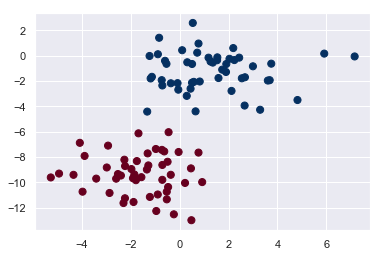

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

# 가상 데이터 생성, 데이터 100개, 특징 2개, 분류 2개
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=2, 
                 cluster_std=1.5)
print(X)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

## 가우스(Gaussian) 나이브 베이즈 분류기
- 가우시안 기법을 써서 예측된 분류된 데이터들을 매끄럽게 보여줌

[9.35696115e-08 2.11979490e-07 4.63399783e-07 ... 1.45501556e-27
 4.31216861e-28 1.23318092e-28]
[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]
[7.71324372e-25 1.62541420e-24 3.35046063e-24 ... 5.25191114e-07
 3.14494120e-07 1.84213378e-07]
[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]


C:\Users\leedonguk\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'color'
  s)
C:\Users\leedonguk\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'color'
  s)


[(-15, 5), (-8, 8)]

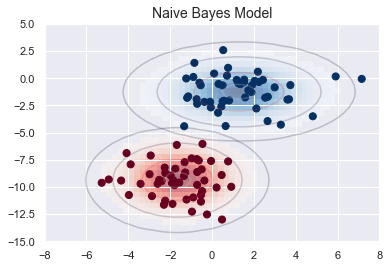

In [2]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)
# 
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)
xlim = (-8,8)
ylim = (-15,5)
# xlim[0] 값과 xlim[1] 값을 60번 쪼개서 xg 리스트에 저장
xg = np.linspace(xlim[0], xlim[1], 60)
# ylim[0] 값과 ylim[1] 값을 40번 쪼개서 yg 리스트에 저장
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T
# label에는 인덱스, color에는 열거형에 정의된 범주가 들어감
for label, color in enumerate(['red', 'blue']):
    # mask는 y와 label이 같은 값(같은 색깔)인지 부울형 데이터를 저장하는 리스트
    mask = (y==label)
    # False = 0, True = 1
    # mask가 True(같은 색깔)인 값들 끼리 평균과 분산 구함
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    print(P)
    Pm = np.ma.masked_array(P, P < 0.03)
    print(Pm.reshape(xx.shape))
    # 색깔
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                 cmap=color.title() + 's')
    # 원형 그래프
    ax.contour(xx, yy, P.reshape(xx.shape),
              levels=[0.01, 0.1, 0.5, 0.9],
              color=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)

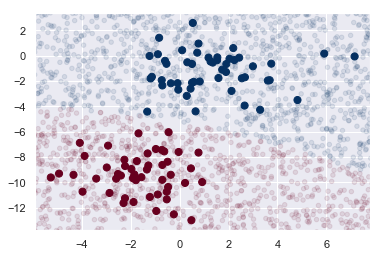

In [3]:
rng = np.random.RandomState(0)
# Xnew에 2차원 2000*2 난수 생성
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="RdBu")
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap="RdBu", alpha=0.1)
plt.axis(lim);

In [4]:
# 새로운 데이터에 대한 결정 경계는 2 차식의 형태인 곡선임
# 각 클래스값이 나올 확률
yprob = model.predict_proba(Xnew)
print(yprob.shape)
yprob[-8:].round(2)

(2000, 2)


array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

## 텍스트 특징
- 텍스트를 대표 수치값의 집합으로 변환 : 단어계수

In [5]:
sample = ['problem of evil',
         'evil queen',
         'horizon problem']
# CountVectorizer : 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW(Bag of Words)
# 인코딩한 벡터를 만든다
# BOW(Bag of Words) : 단어들의 순서는 고려치 않고 출현 빈도에만 집중하는 텍스트 데이터의 
# 수치화 표현방법
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
vec = CountVectorizer()
# fit_transform() 함수를 통해 Counter Vector로 만들 수 있음
X = vec.fit_transform(sample)
# data : X.toarray(), feature : vec.get_feature_names()
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


- TF-IDF(Term Frequency-Inverse Docment Frequency)
- TF(단어 빈도) : 특정 단어가 문서 내에 나타나는 총 빈도수
- IDF(역문서 빈도) : 특정 단어가 문서 집합 전체에서 나타나는 빈도수
- TF-IDF는 두 값의 곱으로 나타냄 (TF * IDF)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


## 다항분포 나이브 베이즈 분류기
- 다항분포(multinomial distribution)는 카테고리 시도를 N번 반복하여 카테고리 K가 Xk번 나올 확률 분포를 말함

- 이 모델은 계수(count)나 계수율을 나타내는 특징에 가장 적절함

- ex: 텍스트 분류

In [7]:
sample = ['problem of evil',
         'evil queen',
         'horizon problem']
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
vec = CountVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


- 텍스트 분류 : 20개 뉴스그룹 말뭉치로부터 추출한 단어 수 특징

In [8]:
# 타겟 데이터 : 문서가 속한 뉴스 그룹, 특징 데이터 : 문서 텍스트
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

- 텍스트 분류 : 학습 데이터와 시험 데이터 다운로드

In [9]:
categories = ['talk.religion.misc', 'soc.religion.christian',
             'sci.space','comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



Text(89.133125, 0.5, 'predicted label')

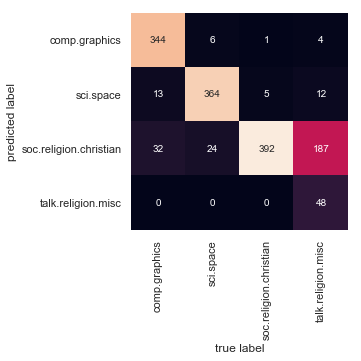

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
# 다항 분포 나이브 베이즈
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)
from sklearn import metrics
# 행렬 생성
mat = metrics.confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [11]:
accuracy = metrics.accuracy_score(test.target, labels)
print(accuracy)

0.8016759776536313


- 하나의 문자열에 대해 예측한 범주 분류

In [12]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [13]:
predict_category('sending a payload to ISS')

'sci.space'

In [14]:
predict_category('discussing islam vs athelism')

'soc.religion.christian'

In [15]:
predict_category('d')

'soc.religion.christian'

# 회귀

## 회귀(regression)란 입력값에 대응하는 출력값을 예측하는 모형을 산출하는 방법
 - 선형 모델(linear model)
 - 비선형 모델(non-linear model)

## 회귀에 적합한 문제
 - 광고 횟수에 따라 매출액 변화
 - 제조 환경의 개선에 따라 생산량 증가
 - 사람의 몸무게와 키의 관계

## 선형 회귀 모델
- 직선을 데이터에 적합시킴
- 직선 적합은 y = ax+b 형식의 모델, a을 기울기, b를 절편이라함
- 기울기 = 2, 절편 = -5인 선 주변에 흩어져 있는 데이터들

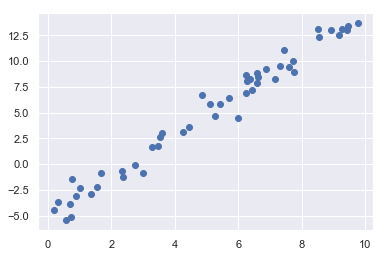

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

rng = np.random.RandomState()
x = 10 * rng.rand(50)
# y = 2x - 5 + 난수(0~10)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

 - 이 데이터를 적합시키고 가장 잘 적합하는 직선을 구성

Model slope :  1.9765751031671908
Model intercept :  -5.010349716172593


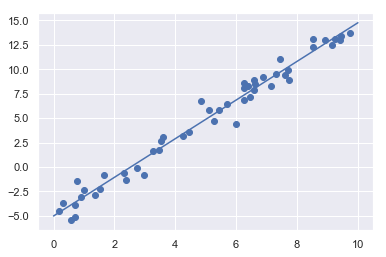

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x,y)
plt.plot(xfit, yfit);

# 기울기
print("Model slope : ", model.coef_[0])
# 절편
print("Model intercept : ", model.intercept_)

## 유도 특징 
 - 입력 특징으로부터 수학적으로 유도된 특징이라는 의미
 - 입력값을 변환해서 선형 회귀를 다항식 회귀로 유도함

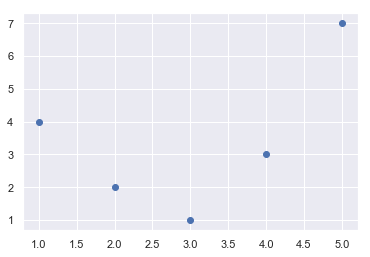

In [18]:
x = np.array([1,2,3,4,5])
y = np.array([4,2,1,3,7])
plt.scatter(x,y)

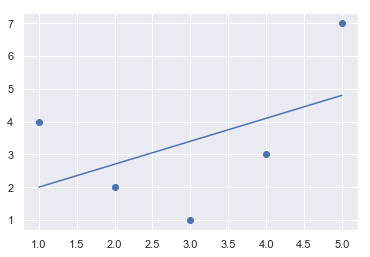

In [19]:
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit)

- 데이터를 변환시킴 -> f(x) = X^n

In [20]:
from sklearn.preprocessing import PolynomialFeatures
# 입력값 x를 다항식으로 변환
# degree : 차수, include_bias : 상수항 여부
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X)
print(X2)

[[1]
 [2]
 [3]
 [4]
 [5]]
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit)

## 기저 함수(basis function) 회귀
 - 선형 회귀를 변수들 간의 비선형 관계에 적응시키는 데 사용할 수 있는 방법은 
    데이터를 기저 함수에 따라 변환하는 것임
 - 다차원 선형 모델
  - y= a0 + a1x1 + a2x2 + a3x3 + ...
  - 단일 차원 입력값 x로부터 x1, x2, x3 등을 생성해야 함
  - xn = fn(x) 여기서 fn()는 데이터 변환 함수임

- 다항식 기저 함수
 - 변환기가 1차원 배열을 각 값의 지수를 취해 3차원 배열로 변환

In [21]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2,3,4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

 - 7차 다항식 모델 생성

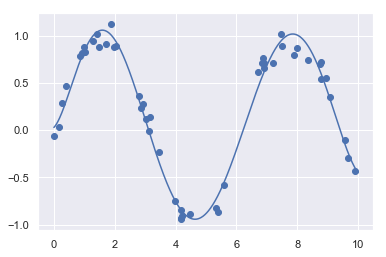

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
xfit = np.linspace(0, 10, 1000)
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

## 가우스 기저 함수

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """1차원 입력에 대해 균일한 간격을 가지는 가우시안 특징"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
        
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    def fit(self, X, y=None):
        # 데이터 범위를 따라 펼쳐진 N개의 중앙점 생성
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transfrom(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, 
                                 self.width_, axis=1)

 - 가우스 기저 함수 적합

In [24]:
gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

gauss_model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

TypeError: All intermediate steps should be transformers and implement fit and transform. 'GaussianFeatures(N=20, width_factor=2.0)' (type <class '__main__.GaussianFeatures'>) doesn't